In [1]:
import gaussianfft
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10.0, 7.0]  # notebook

# Basic plot

In [21]:
v = gaussianfft.variogram('gaussian', 1000.0, 250.0, azimuth=30)
nx, ny = 750, 1000
dx, dy = 10, 10
field = gaussianfft.simulate(v, nx, dx, ny, dy)
field_array = np.array(field).reshape((nx, ny), order='F')

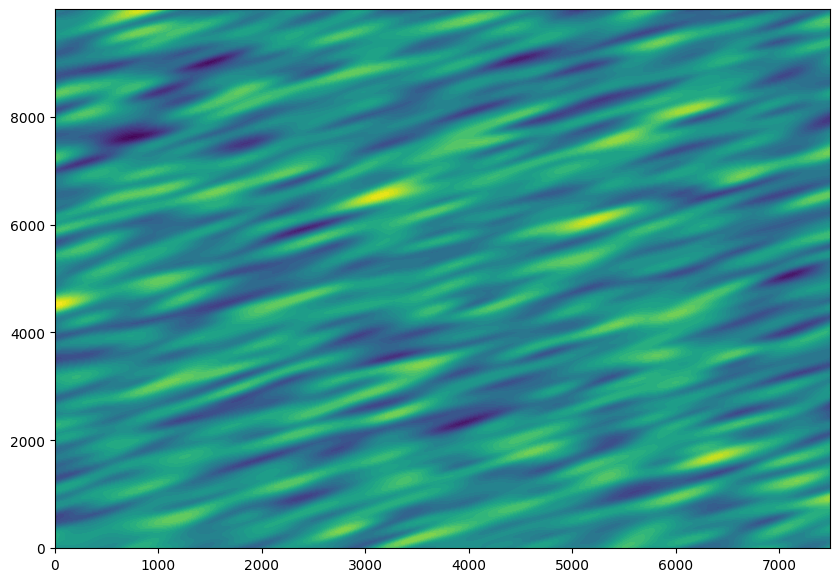

In [3]:
plt.contourf(np.arange(0, nx) * dx,
             np.arange(0, ny) * dy,
             field_array.T,
             40)

# Variogram comparisons

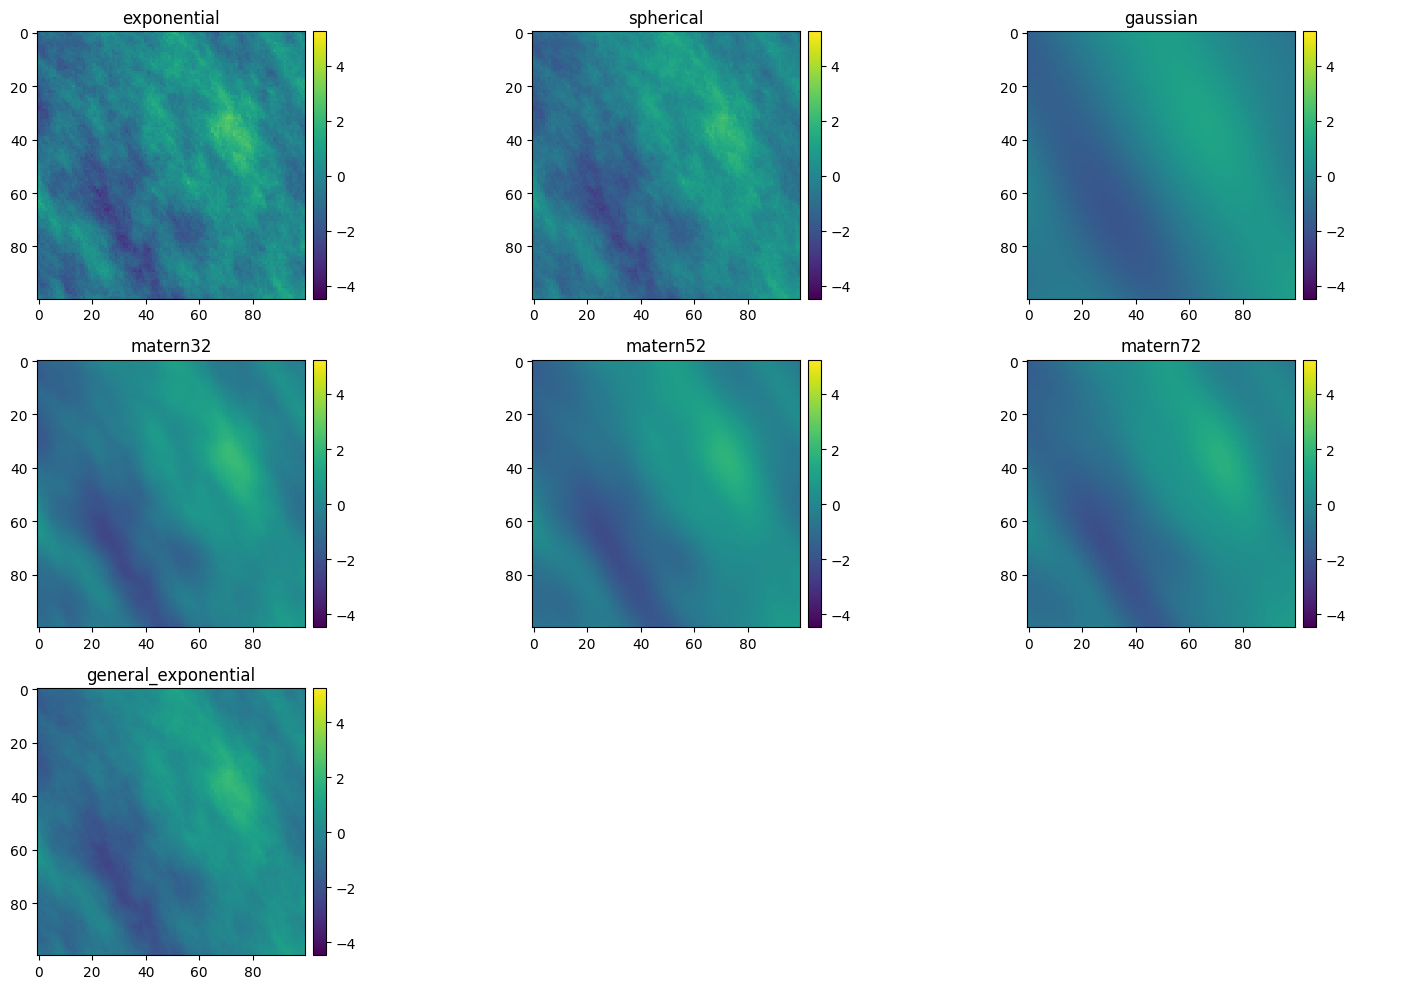

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vtypes = ['exponential', 'spherical', 'gaussian', 'matern32', 'matern52', 'matern72', 'general_exponential']
fields = {}
nx, ny = 1500, 2000
dx, dy = 10, 10
for t in vtypes:
    gaussianfft.seed(123)
    vario = gaussianfft.variogram(t, 1000.0, 500.0, azimuth=30, power=1.5)
    fields[t] = np.array(
        gaussianfft.simulate(vario, nx, dx, ny, dy)
    ).reshape((nx, ny), order='F')

shown_variograms = vtypes

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Find global minimum and maximum values for the color scale
global_min = min(field.min() for field in fields.values())
global_max = max(field.max() for field in fields.values())

# Flatten the axes array for easy iteration
axes_flat = axes.flat

for t, ax in zip(shown_variograms, axes_flat):
    im = ax.imshow(fields[t][700:800, 950:1050], interpolation='None', vmin=global_min, vmax=global_max)
    ax.set_title(t)

    # Add colorbar to each subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.08)
    plt.colorbar(im, cax=cax)

axes_flat[7].axis('off')
axes_flat[8].axis('off')

fig.tight_layout()

# Azimuth verification

In [5]:
azimuth_fields = []
angles = [0, 30, 60, 90, 120, 150]
for a in angles:
    gaussianfft.seed(1231312)
    v = gaussianfft.variogram('gaussian', 1000.0, 250.0, azimuth=a)
    nx, ny = 750, 1000
    dx, dy = 10, 10
    field = gaussianfft.simulate(v, nx, dx, ny, dy)
    field_array = np.array(field).reshape((nx, ny), order='F')
    azimuth_fields.append(field_array)

subplots = [231, 232, 233, 234, 235, 236]
for t, s, a in zip(azimuth_fields, subplots, angles):
    plt.subplot(s)
    plt.contourf(np.arange(0, nx) * dx,
                 np.arange(0, ny) * dy,
                 t.T,
                 40)
    plt.title("azimuth=" + str(a))
plt.show()

# Experimental padding (Advanced)

## 2D

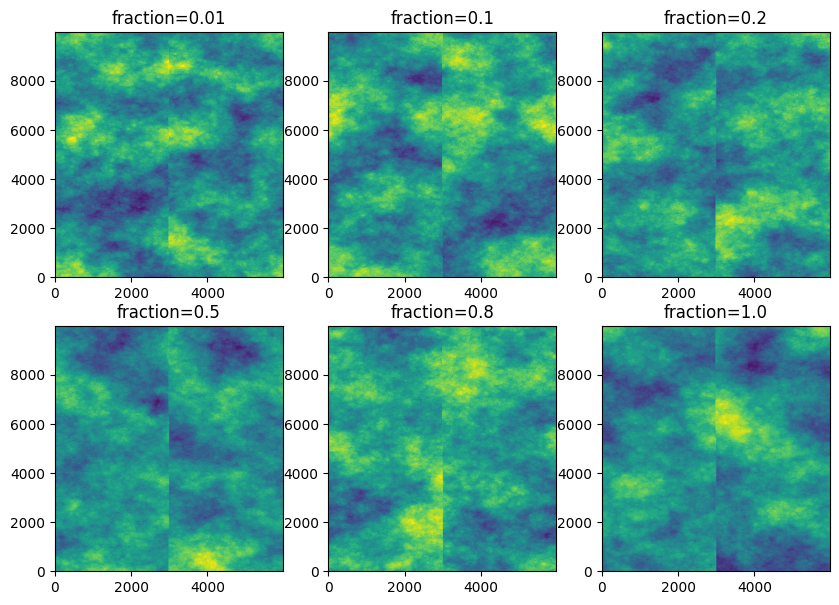

In [17]:
padding_fields = []
padding_fraction = [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
v = gaussianfft.variogram('spherical', 2000.0, 2000.0)
nx, ny = 300, 500
dx, dy = 20, 20
for f in padding_fraction:
    gaussianfft.seed(1231312)
    field = gaussianfft.advanced.simulate(v, nx, dx, ny, dy, padx=int(nx * f), pady=int(ny * f))
    field_array = np.array(field).reshape((nx, ny), order='F')
    padding_fields.append(field_array)

subplots = [231, 232, 233, 234, 235, 236]
for t, s, a in zip(padding_fields, subplots, padding_fraction):
    t = np.roll(t, int(nx/2), axis=0)
    plt.subplot(s)
    plt.contourf(np.arange(0, nx) * dx,
                 np.arange(0, ny) * dy,
                 t.T,
                 40)
    plt.title("fraction=" + str(a))
plt.show()

### Inspect differences when rolling

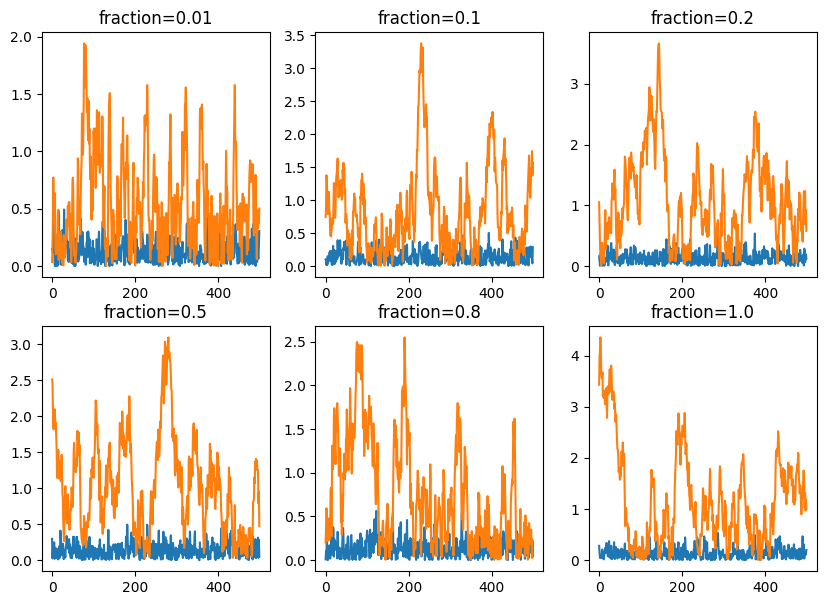

In [18]:
subplots = [231, 232, 233, 234, 235, 236]
for t, s, a in zip(padding_fields, subplots, padding_fraction):
    t = np.roll(t, int(nx/2), axis=0)
    t = np.abs(np.diff(t, axis=0))
    plt.subplot(s)
    plt.plot(t[int(nx/2),:])
    plt.plot(t[int(nx/2)-1,:])
    #plt.contourf(np.arange(0, nx - 1) * dx,
    #             np.arange(0, ny) * dy,
    #             t.T,
    #             40,
    #             vmax=2.5)
    plt.title("fraction=" + str(a))
plt.show()

## 1D

In [19]:
padding_fields = []
padding_fraction = [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
v = gaussianfft.variogram('spherical', 1000.0)
nx = 300
dx = 20
for f in padding_fraction:
    gaussianfft.seed(1231312)
    field = gaussianfft.advanced.simulate(v, nx, dx, padx=int(nx * f))
    field_array = np.array(field)
    padding_fields.append(field_array)

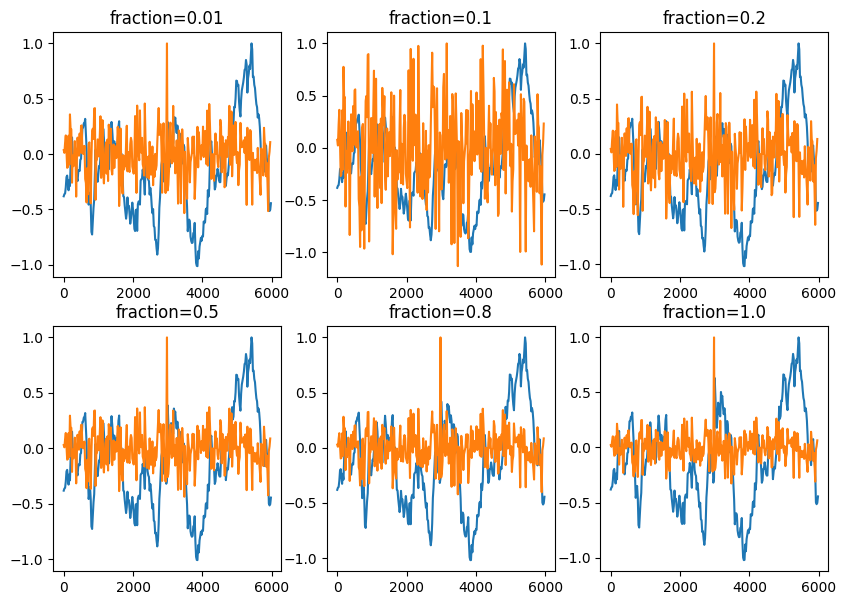

In [20]:
subplots = [231, 232, 233, 234, 235, 236]
for t, s, a in zip(padding_fields, subplots, padding_fraction):
    t = np.roll(t, int(nx/2))
    plt.subplot(s)
    plt.plot(np.arange(0, nx) * dx, t / np.max(t))
    plt.plot(np.arange(0, nx-1) * dx, np.diff(t) / np.max(np.diff(t)))
    plt.title("fraction=" + str(a))
plt.show()